In [1]:
from matplotlib import pyplot as plt
from data import generate_A, generate_b
from algorithms import jacobi_method, gauss_seidel_method

In [2]:
MATRIX_DIMENTIONS = (939, 939)


In [3]:
A = generate_A(MATRIX_DIMENTIONS, 3, -1, -1)
b = generate_b(MATRIX_DIMENTIONS[0])

In [4]:
x_jacobi, iterations_jacobi, error_jacobi = jacobi_method(A, b)

[218296950411.82446, 352184644438.8555, 516630880123.9451, 666797598524.0486, 819028897420.7642, 966296574432.0157, 1110564606638.613, 1250411883779.2102, 1385775110209.284, 1516139165270.708, 1641233714526.4788, 1760769469954.9814, 1874540677128.4475, 1982386197271.6287, 2084203495600.4426, 2179941251652.418, 2269599117399.733, 2353223823454.4507, 2430905897675.5894, 2502775505714.4116, 2568998131050.9937, 2629769968435.012, 2685313224802.069, 2735871392810.4917, 2781704601860.8955, 2823085123959.735, 2860293107928.8784, 2893612601087.272, 2923327906321.821, 2949720309769.982, 2973065202474.9917, 2993629607935.2866, 3011670117012.53, 3027431222295.524, 3041144035936.4976, 3053025368260.5684, 3063277139142.1855, 3072086090227.7153, 3079623763503.23, 3086046710364.541, 3091496895118.283, 3096102257583.2173, 3099977401012.722, 3103224373760.5327, 3105933515802.193, 3108184344251.574, 3110046455234.614, 3111580422775.694, 3112838678607.854, 3113866359947.063, 3114702115202.602, 3115378860

Text(0.5, 1.0, 'Jacobi method')

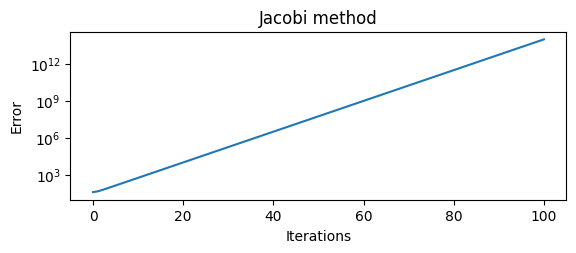

In [5]:
print(x_jacobi)
print("Iterations: ", iterations_jacobi)
plt.subplot(2, 1, 1)
plt.plot(error_jacobi)
plt.title("Jacobi method")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.yscale("log")
plt.title("Jacobi method")

In [6]:
x_gauss, iterations_gauss, error_gauss = gauss_seidel_method(A, b)

[6.308207264442234e+22, 1.223445882705217e+23, 2.122576707318414e+23, 3.252035837100558e+23, 4.729768294928068e+23, 6.607544963504336e+23, 8.98495021502772e+23, 1.1963859515769807e+24, 1.5671492479200277e+24, 2.0254647347655252e+24, 2.5886774436709446e+24, 3.2770145227962374e+24, 4.114075386052752e+24, 5.127274852578978e+24, 6.348382421818213e+24, 7.814103182225194e+24, 9.566730592452387e+24, 1.1654865454520767e+25, 1.4134210999849993e+25, 1.7068447567779513e+25, 2.0530193293174606e+25, 2.460205610508346e+25, 2.937778290279834e+25, 3.4963511563963643e+25, 4.147913149334553e+25, 4.905975828834139e+25, 5.7857327964328185e+25, 6.804231596302403e+25, 7.980558589030285e+25, 9.336037257695579e+25, 1.0894440362889367e+26, 1.2682216312568013e+26, 1.472873005358652e+26, 1.7066518724100934e+26, 1.9731562229553842e+26, 2.2763568819501853e+26, 2.62062756480363e+26, 3.0107764196993868e+26, 3.452079032865237e+26, 3.950312861335427e+26, 4.5117930447796896e+26, 5.1434095341981146e+26, 5.85266546075393

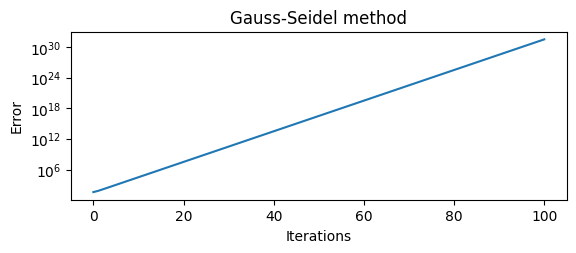

In [7]:
print(x_gauss)
print("Iterations: ", iterations_gauss)
plt.subplot(2, 1, 2)
plt.plot(error_gauss)
plt.title("Gauss-Seidel method")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.yscale("log")
plt.show()